In [35]:


import os
import time
import pickle
import cv2 as cv
import numpy as np 
import pyttsx3 as tts
from mtcnn import MTCNN
import tensorflow as tf 
from sklearn.svm import SVC
import matplotlib.pyplot as plt 
from keras_facenet import FaceNet
#from serial import Serial, SerialException
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



Exception ignored in: <_io.BufferedReader>
Traceback (most recent call last):
  File "d:\durjoy\venv\Lib\site-packages\lz4\frame\__init__.py", line 753, in flush
    self._fp.flush()
ValueError: I/O operation on closed file.
Exception ignored in: <_io.BufferedReader>
Traceback (most recent call last):
  File "d:\durjoy\venv\Lib\site-packages\lz4\frame\__init__.py", line 753, in flush
    self._fp.flush()
ValueError: I/O operation on closed file.
Exception ignored in: <_io.BufferedReader>
Traceback (most recent call last):
  File "d:\durjoy\venv\Lib\site-packages\lz4\frame\__init__.py", line 753, in flush
    self._fp.flush()
ValueError: I/O operation on closed file.


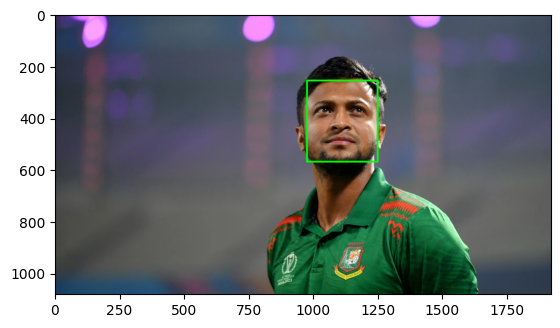

In [36]:


detector = MTCNN()
img = "test.webp"
img = cv.imread(img)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
x,y,w,h = detector.detect_faces(img)[0]['box']
cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),5)
plt.imshow(img)


In [37]:
class Feature_Extraction:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160, 160)
        self.detector = MTCNN()
        self.X = []
        self.Y = []

    def extract_face(self, file_name):
        img = cv.imread(file_name)
        if img is None:
            print(f"Failed to load image {file_name}. It may be corrupted or not exist.")
            return None
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        faces = self.detector.detect_faces(img)

        if len(faces) == 0:
            print(f"No faces found in {file_name}.")
            return None

        x, y, width, height = faces[0]['box']
        x, y = abs(x), abs(y)
        face = img[y:y + height, x:x + width]
        face_arr = cv.resize(face, self.target_size)
        return face_arr

    def load_faces(self, dir):
        FACE = []
        for im_name in os.listdir(dir):
            try:
                path = os.path.join(dir, im_name)
                single_face = self.extract_face(path)
                if single_face is not None:
                    FACE.append(single_face)
            except Exception as e:
                print("Exception while load_face: {}".format(e))
        return FACE

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = os.path.join(self.directory, sub_dir)
            print(path)
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            self.X.extend(FACES)
            self.Y.extend(labels)
        return np.asarray(self.X), np.asarray(self.Y)
    

    def plot_image(self):
        for num,image in enumerate(self.X):
            ncols = 6
            nrows = (int) (len(self.Y)//ncols)
            if num>= ncols*nrows:
                break
            plt.subplot(nrows,ncols,num+1)
            plt.axis("off")
            plt.imshow(image)


face_loading = Feature_Extraction("train_data")
X,Y = face_loading.load_classes()

Exception ignored in: <_io.BufferedReader>
Traceback (most recent call last):
  File "d:\durjoy\venv\Lib\site-packages\lz4\frame\__init__.py", line 753, in flush
    self._fp.flush()
ValueError: I/O operation on closed file.
Exception ignored in: <_io.BufferedReader>
Traceback (most recent call last):
  File "d:\durjoy\venv\Lib\site-packages\lz4\frame\__init__.py", line 753, in flush
    self._fp.flush()
ValueError: I/O operation on closed file.
Exception ignored in: <_io.BufferedReader>
Traceback (most recent call last):
  File "d:\durjoy\venv\Lib\site-packages\lz4\frame\__init__.py", line 753, in flush
    self._fp.flush()
ValueError: I/O operation on closed file.


train_data\durjoy
train_data\hadi


917


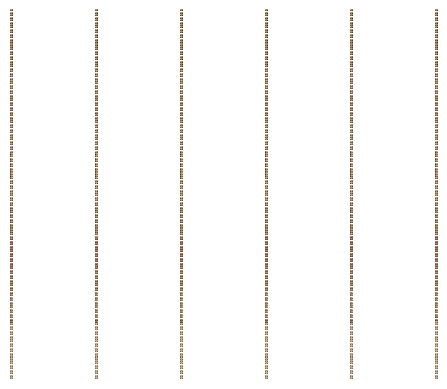

In [38]:

print(len(Y))
face_loading.plot_image()


In [39]:


embedder = FaceNet()

def get_embedding(img):
    face_img = img.astype(np.float32) # 3d (160,160,3)
    face_img = np.expand_dims(face_img,axis=0) # 4D (None,160,160,3)
    yhat = embedder.embeddings(face_img)
    return yhat

EMBEDDING_X  = []
for img in X:
    EMBEDDING_X.append(get_embedding(img))
EMBEDDING_X = np.asarray(EMBEDDING_X)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━

In [40]:


# total image count:
import os 
X.shape,Y.shape,len(os.listdir("train_data/durjoy"))



((917, 160, 160, 3), (917,), 638)

In [41]:

#save the embeddings and labels
np.savez_compressed("face_net_embedding",EMBEDDING_X,Y)


<br>
<br>
<br>

# `model: tranning:`

<br>
<br>
<br>

In [42]:
Y

array(['durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy',
       'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy',
       'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy',
       'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy',
       'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy',
       'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy',
       'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy',
       'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy',
       'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy',
       'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy',
       'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy',
       'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy',
       'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy',
       'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy',
       'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durjoy', 'durj

In [43]:
labelEncoder = LabelEncoder()
Y = labelEncoder.fit_transform(Y)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [44]:
X_train,X_test,y_train,y_test = train_test_split(EMBEDDING_X,Y,test_size=0.2,random_state=17,shuffle=True)
print("X_train shpae : {}".format(X_train.shape))
print("y_train shpae : {}".format(y_train.shape))
print("X_test shpae : {}".format(X_test.shape))
print("y_test shpae : {}".format(y_test.shape))

X_train shpae : (733, 1, 512)
y_train shpae : (733,)
X_test shpae : (184, 1, 512)
y_test shpae : (184,)


In [45]:

# Reshape to remove the extra dimension (111, 1, 512) -> (111, 512)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


In [46]:

from sklearn.dummy import DummyClassifier

# ensure there are at least two classes before training SVC
n_classes = len(np.unique(y_train))
if n_classes < 2:
	print(f"Only {n_classes} class(es) in y_train. Using DummyClassifier fallback.")
	model = DummyClassifier(strategy="most_frequent")
else:
	model = SVC(kernel="linear", probability=True)

model.fit(X_train, y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [47]:
y_pred = model.predict(X_test)
accuracy_score(y_pred=y_pred,y_true=y_test)*100

100.0

In [48]:
with open("svm_face_verification_model.pkl",'wb') as f:
    pickle.dump(model,f)

In [ ]:
# Initialize face recognition components
facenet = FaceNet()
faces_embeddings = np.load("face_net_embedding.npz")
labelEncoder_new = LabelEncoder()   
labelEncoder_new.fit(faces_embeddings['arr_1'])
haarcascade = cv.CascadeClassifier("haarcascade_frontalface_default.xml")
model = pickle.load(open("svm_face_verification_model.pkl", 'rb'))

UNKNOWN_THRESHOLD = 0.92
cap = cv.VideoCapture(0)


# # --------------------------- arduino connection start -----------------------------------------
# # Set up serial communication
# arduino_port = '/dev/ttyACM0'
# arduino = None

# try:
#     arduino = Serial(arduino_port, 9600)
#     time.sleep(2)  # Give time for the connection to establish
#     print("Arduino connected successfully")
# except SerialException as e:
#     print(f"Error connecting to Arduino: {e}")
#     exit


# Variables for timing
last_detection_time = 0
detection_duration = 20

# Time before door closes to announce closing
door_closing_warning = 3


while cap.isOpened():
    current_time = time.time()
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    frame = cv.flip(frame, 1)
    rgb_img = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    gray_img = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    faces = haarcascade.detectMultiScale(gray_img, 1.3, 5)

    for x, y, w, h in faces:
            img = rgb_img[y:y+h, x:x+w]
            img = cv.resize(img, (160, 160))
            img = np.expand_dims(img, axis=0)
            ypred = facenet.embeddings(img)

            proba = model.predict_proba(ypred)
            max_proba_index = np.argmax(proba)
            confidence = proba[0][max_proba_index]
            print(confidence)
            face_name = model.classes_[max_proba_index]

        # ------------ check the confidence score ----------------
            if confidence > UNKNOWN_THRESHOLD:
                final_name = labelEncoder_new.inverse_transform([face_name])[0]
                cv.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 255), 2)
                cv.putText(frame, str(final_name), (x, y-10), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3, cv.LINE_AA)
                    
                if current_time - last_detection_time < detection_duration:
                    procecssing_name = f"processing for {final_name}"
                    #time_in = time_in - 1
                    cv.putText(frame, procecssing_name, (50, 50), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3, cv.LINE_AA)
                
                # Skip sending command to Arduino during processing period
                if (current_time - last_detection_time) >= detection_duration:
                    #arduino.write(f"OPEN {final_name}\n".encode())
                    print(f"Command sent to Arduino: OPEN {final_name}")
                    say_name = str(f"Door is opening for {final_name} about 10 second")
                    # engine.say(say_name)
                    # engine.setProperty('rate',125)
                    # engine.runAndWait()
                    last_detection_time = current_time 
                    #time_in = detection_duration 
                
              
            else:
                cv.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 255), 2)
                cv.putText(frame, "Unknown Person", (x, y-10), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3, cv.LINE_AA)
                final_name = "Unknown Person"
                # arduino.write(f"Wrong \n".encode())
                if current_time - last_detection_time >= detection_duration:
                    last_detection_time = current_time 

    cv.imshow("Face Recognition:", frame)
    if cv.waitKey(1) & 0xff == ord('q'):
        break

cap.release()
cv.destroyAllWindows()



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
0.9283236684949707
Command sent to Arduino: OPEN durjoy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
0.5202725843199083
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
0.7246496569480179
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
0.9608566056914551
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
0.9562159869421673
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
0.901548473704309
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
0.9562314720180278
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
0.9703905197413086
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
0.9673957470527941
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
0.988418696228449
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
0.9877575256187792
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
0.9847267779336648
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
0.9884434642793479
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
0.9927084534859554
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
0.9901025340209824
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
0.9893218283673538
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
0.98657193

In [ ]:
def face_lock():
    facenet = FaceNet()
    faces_embeddings = np.load("face_net_embedding.npz") # file1
    labelEncoder_new = LabelEncoder()   
    labelEncoder_new.fit(faces_embeddings['arr_1'])
    haarcascade = cv.CascadeClassifier("haarcascade_frontalface_default.xml") #file2
    model = pickle.load(open("svm_face_verification_model.pkl", 'rb'))
    
    UNKNOWN_THRESHOLD = 0.92
    cap = cv.VideoCapture(0)
    
    
    # # --------------------------- arduino connection start -----------------------------------------
    # # Set up serial communication
    # arduino_port = '/dev/ttyACM0'
    # arduino = None
    
    # try:
    #     arduino = Serial(arduino_port, 9600)
    #     time.sleep(2)  # Give time for the connection to establish
    #     print("Arduino connected successfully")
    # except SerialException as e:
    #     print(f"Error connecting to Arduino: {e}")
    #     exit
    
    
    # Variables for timing
    last_detection_time = 0
    detection_duration = 20
    
    # Time before door closes to announce closing
    door_closing_warning = 3
    
    
    while cap.isOpened():
        current_time = time.time()
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break
    
        frame = cv.flip(frame, 1)
        rgb_img = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        gray_img = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        faces = haarcascade.detectMultiScale(gray_img, 1.3, 5)
    
        for x, y, w, h in faces:
                img = rgb_img[y:y+h, x:x+w]
                img = cv.resize(img, (160, 160))
                img = np.expand_dims(img, axis=0)
                ypred = facenet.embeddings(img)
    
                proba = model.predict_proba(ypred)
                max_proba_index = np.argmax(proba)
                confidence = proba[0][max_proba_index]
                print(confidence)
                face_name = model.classes_[max_proba_index]
    
            # ------------ check the confidence score ----------------
                if confidence > UNKNOWN_THRESHOLD:
                    final_name = labelEncoder_new.inverse_transform([face_name])[0]
                    cv.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 255), 2)
                    cv.putText(frame, str(final_name), (x, y-10), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3, cv.LINE_AA)
                        
                    if current_time - last_detection_time < detection_duration:
                        procecssing_name = f"processing for {final_name}"
                        #time_in = time_in - 1
                        cv.putText(frame, procecssing_name, (50, 50), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3, cv.LINE_AA)
                    
                    # Skip sending command to Arduino during processing period
                    if (current_time - last_detection_time) >= detection_duration:
                        #arduino.write(f"OPEN {final_name}\n".encode())
                        print(f"Command sent to Arduino: OPEN {final_name}")
                        say_name = str(f"Door is opening for {final_name} about 10 second")
                        # engine.say(say_name)
                        # engine.setProperty('rate',125)
                        # engine.runAndWait()
                        last_detection_time = current_time 
                        #time_in = detection_duration 
                    
                  
                else:
                    cv.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 255), 2)
                    cv.putText(frame, "Unknown Person", (x, y-10), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3, cv.LINE_AA)
                    final_name = "Unknown Person"
                    # arduino.write(f"Wrong \n".encode())
                    if current_time - last_detection_time >= detection_duration:
                        last_detection_time = current_time 
    
        cv.imshow("Face Recognition:", frame)
        if cv.waitKey(1) & 0xff == ord('q'):
            break
    
    cap.release()
    cv.destroyAllWindows()
    
    
        